# **Exploratory Data Analysis (EDA):**

**1.	Load the Titanic datasets using Python's pandas library.**

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [103]:
# Load the datasets
train_data = pd.read_csv('/content/sample_data/Titanic_train.csv')
test_data = pd.read_csv('/content/sample_data/Titanic_test.csv')

In [104]:
# Display the first few rows of each dataset
print("Training Data:")
print(display(train_data.head()))

Training Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


None


In [105]:
print("\nTest Data:")
print(display(test_data.head()))


Test Data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


None


**2.	Check for missing values.**

In [106]:
# Check for missing values in the training data
print("Missing values in the training data:")
print(train_data.isnull().sum())

Missing values in the training data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [107]:
print("\nMissing values in the test data:")
print(test_data.isnull().sum())


Missing values in the test data:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [108]:
# Fill missing Age values with the median age
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

In [111]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [112]:
# Fill missing Embarked values with the most common port
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
# Fill missing Fare values in the test set with the median fare
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [113]:
# Drop the Cabin column as it has too many missing values
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

**3.	Explore data distributions using histograms and box plots.**

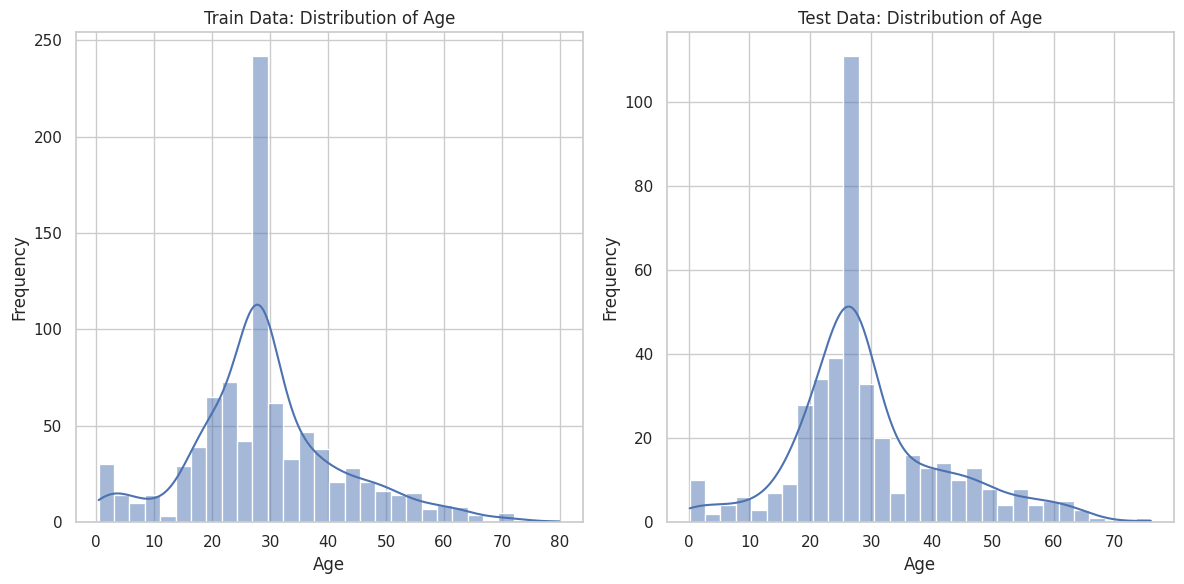

In [114]:
#Distribution of Age
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30)
plt.title('Train Data: Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_data['Age'].dropna(), kde=True, bins=30)
plt.title('Test Data: Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

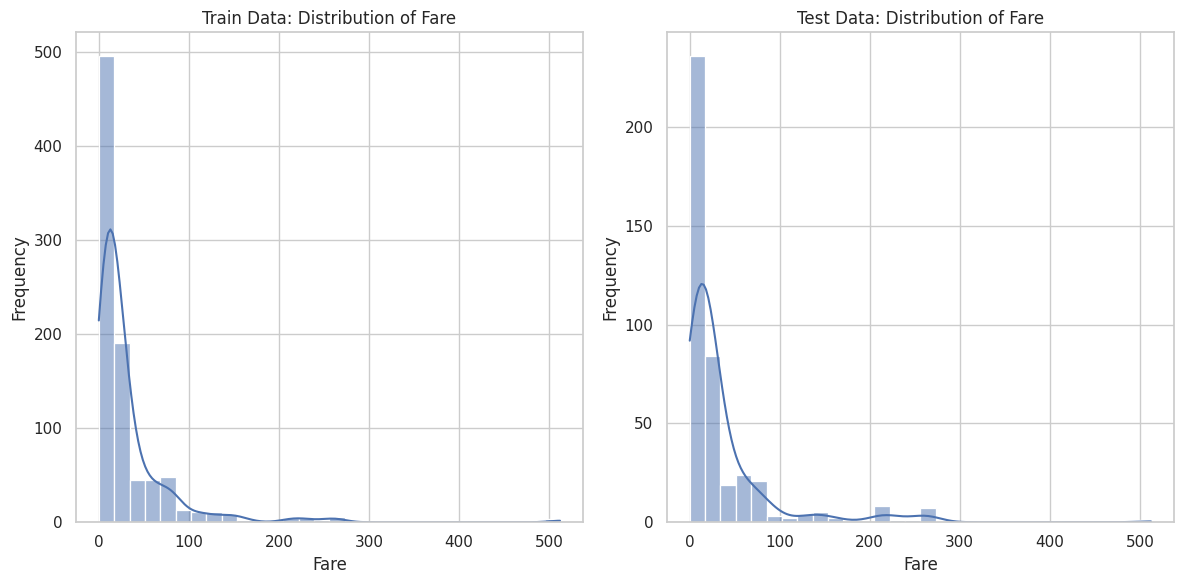

In [115]:
#Distribution of Fare
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data['Fare'].dropna(), kde=True, bins=30)
plt.title('Train Data: Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_data['Fare'].dropna(), kde=True, bins=30)
plt.title('Test Data: Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

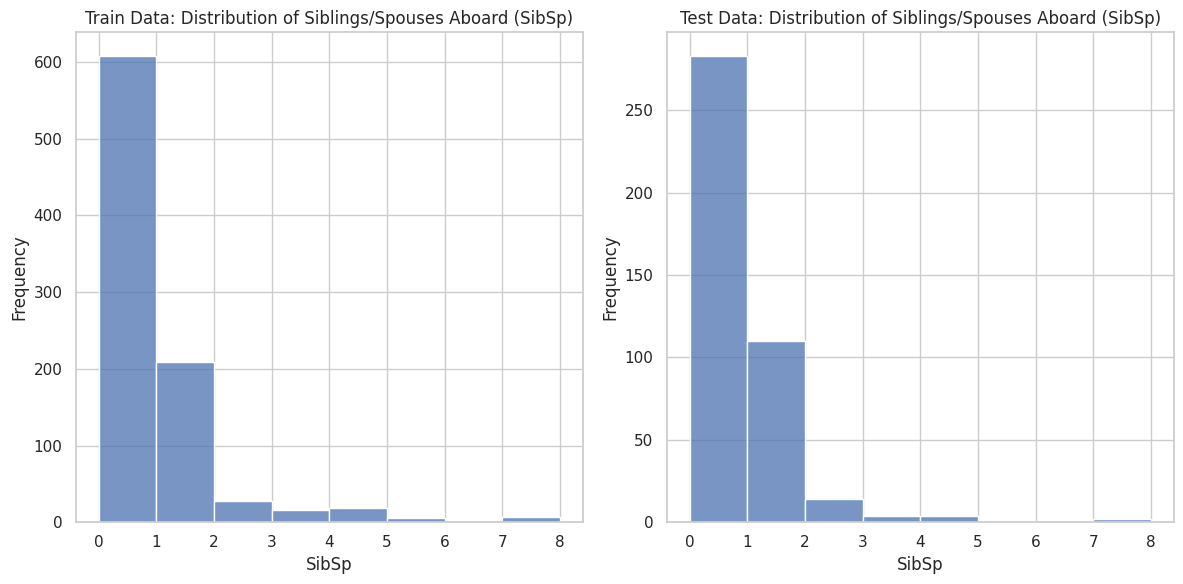

In [116]:
#Distribution of SibSp (Number of Siblings/Spouses Aboard)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data['SibSp'], kde=False, bins=8)
plt.title('Train Data: Distribution of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_data['SibSp'], kde=False, bins=8)
plt.title('Test Data: Distribution of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

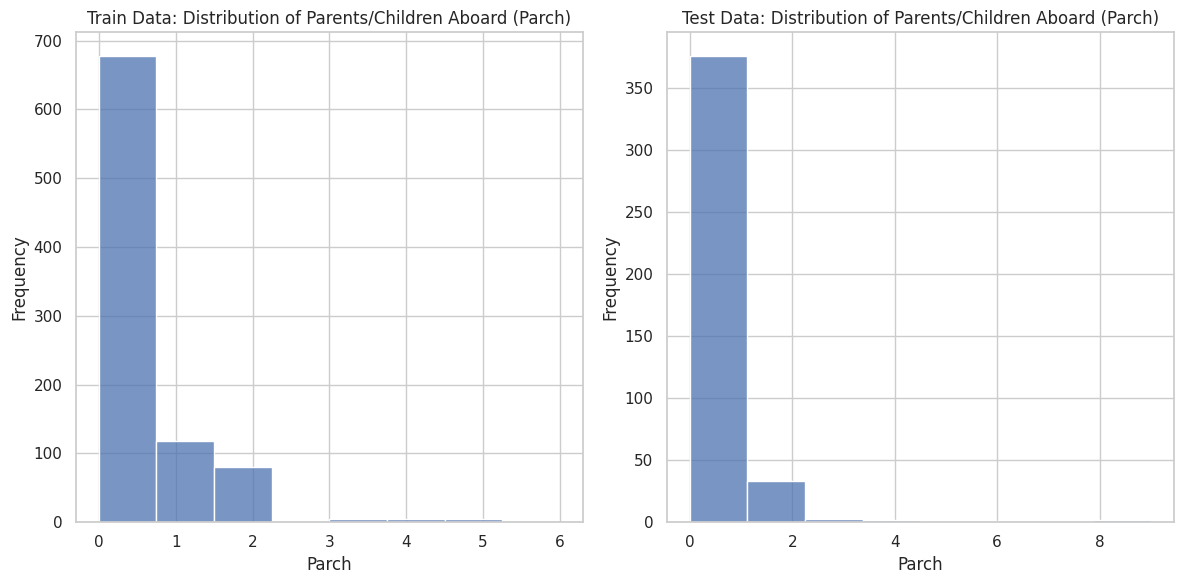

In [117]:
# Distribution of Parch (Number of Parents/Children Aboard)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data['Parch'], kde=False, bins=8)
plt.title('Train Data: Distribution of Parents/Children Aboard (Parch)')
plt.xlabel('Parch')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(test_data['Parch'], kde=False, bins=8)
plt.title('Test Data: Distribution of Parents/Children Aboard (Parch)')
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Data Distributions Using Box Plots**

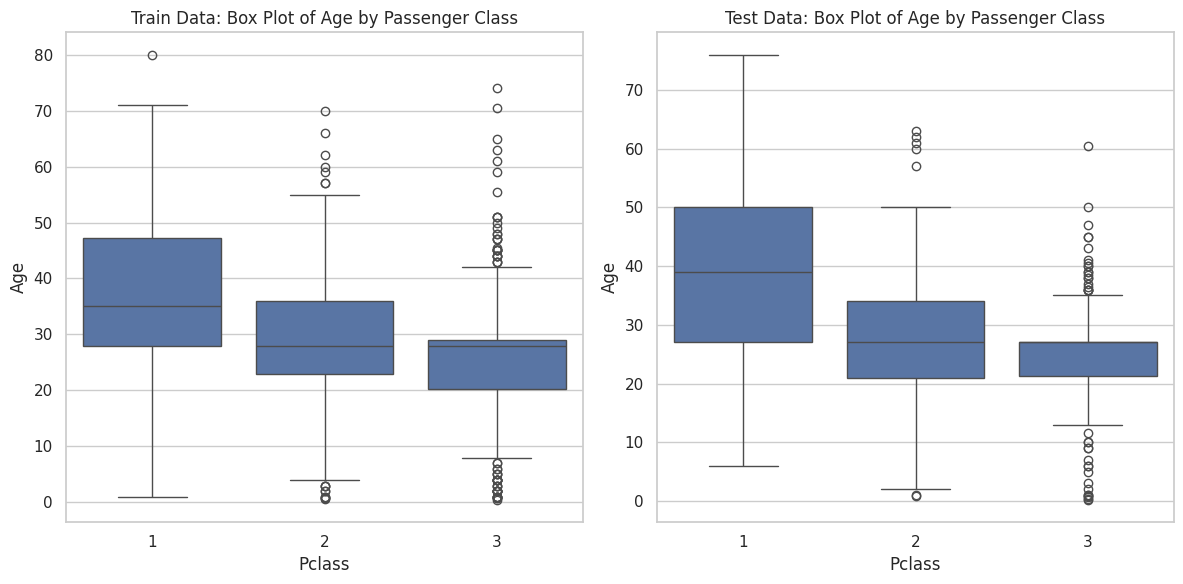

In [118]:
#Box Plot of Age by Passenger Class (Pclass)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.title('Train Data: Box Plot of Age by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')

plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Age', data=test_data)
plt.title('Test Data: Box Plot of Age by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

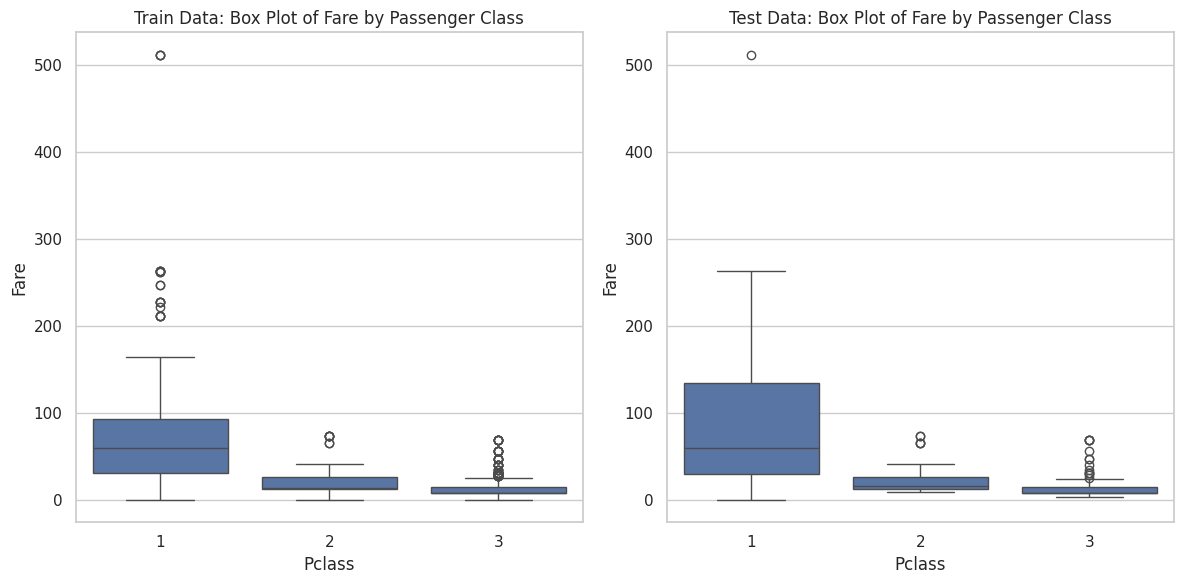

In [119]:
#Box Plot of Fare by Passenger Class (Pclass)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Train Data: Box Plot of Fare by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Fare')

plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', data=test_data)
plt.title('Test Data: Box Plot of Fare by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

**Pair Plot for Additional Insights**

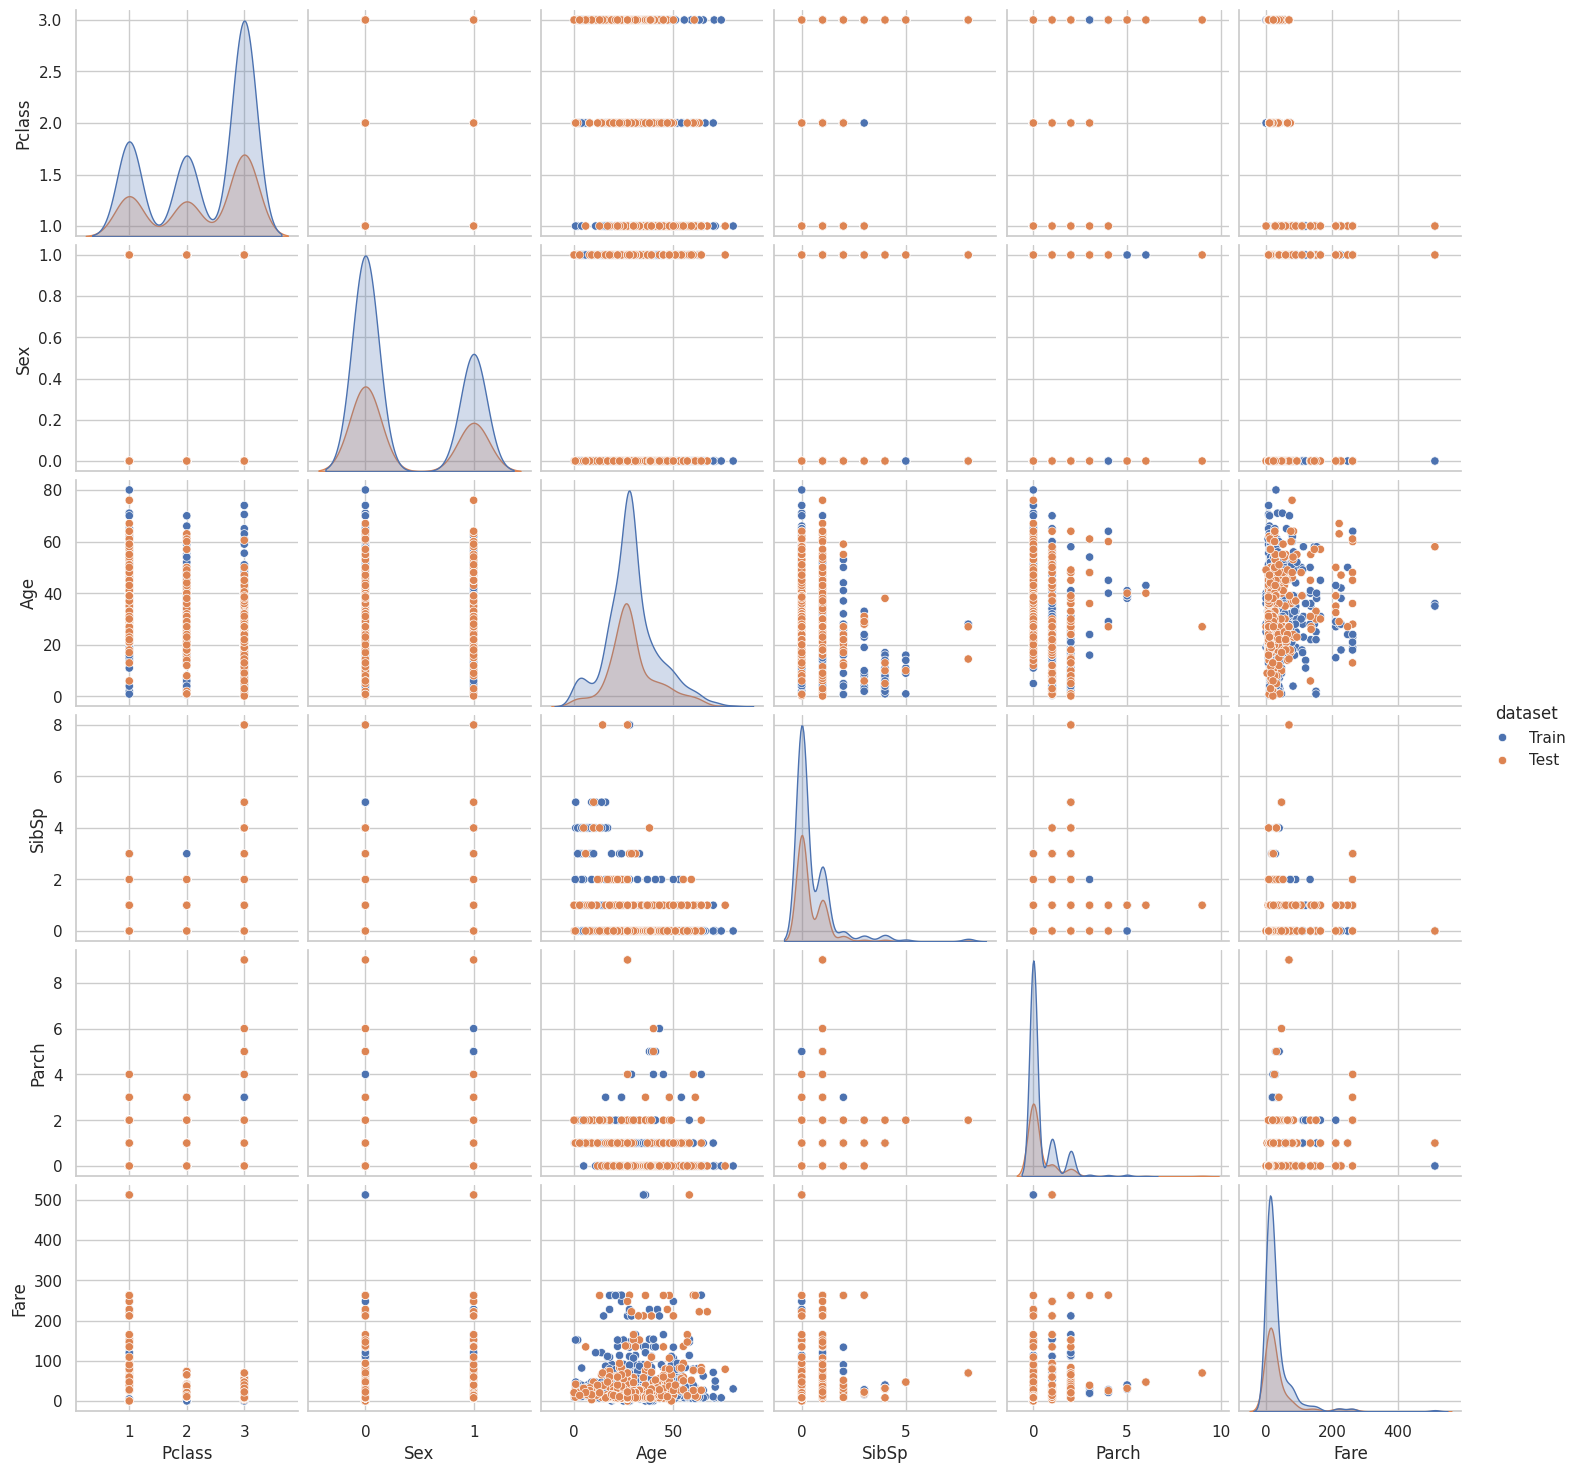

In [120]:
# Combine train and test data for a unified pair plot (only for common features)
combined_data = pd.concat([train_data.assign(dataset='Train'), test_data.assign(dataset='Test')])

# Convert categorical variables to numeric
combined_data['Sex'] = combined_data['Sex'].map({'male': 0, 'female': 1})
combined_data['Embarked'] = combined_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Pair plot
sns.pairplot(combined_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'dataset']], hue='dataset', diag_kind='kde')
plt.show()

**4.	Visualize relationships between features and survival using scatter plots and bar plots.**

**Visualize Relationships in the Training Data**

In [122]:
# Set plot style for better visuals
sns.set(style="whitegrid")

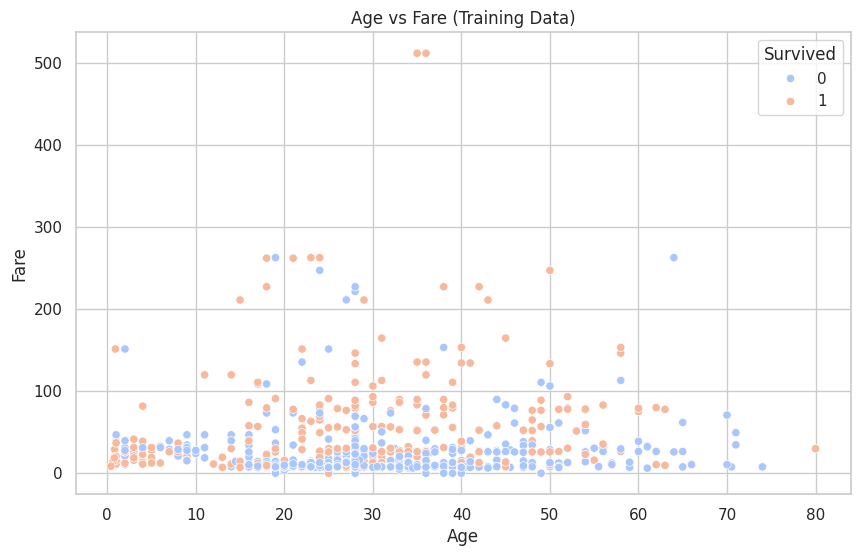

In [123]:
# Scatter plot: Age vs Fare with Survival hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data, palette='coolwarm')
plt.title('Age vs Fare (Training Data)')
plt.show()

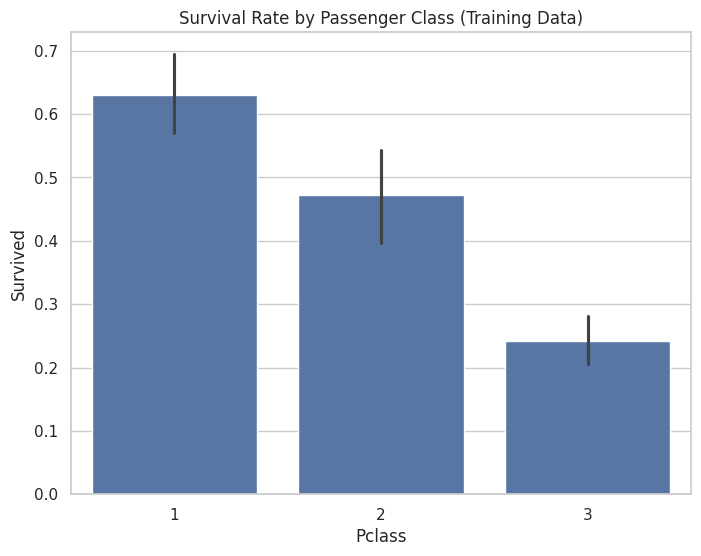

In [124]:
# Bar plot: Survival rate by Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class (Training Data)')
plt.show()

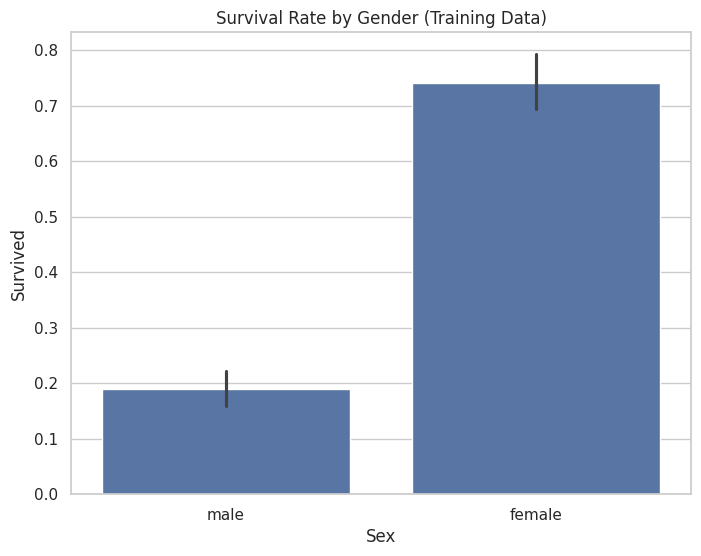

In [125]:
# Bar plot: Survival rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Gender (Training Data)')
plt.show()

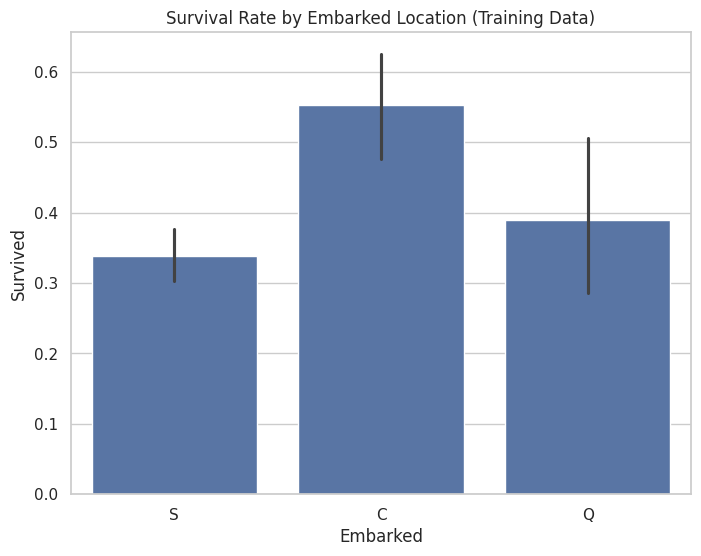

In [126]:
# Bar plot: Survival rate by Embarked location
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked Location (Training Data)')
plt.show()

**Visualize Relationships in the Test Data**


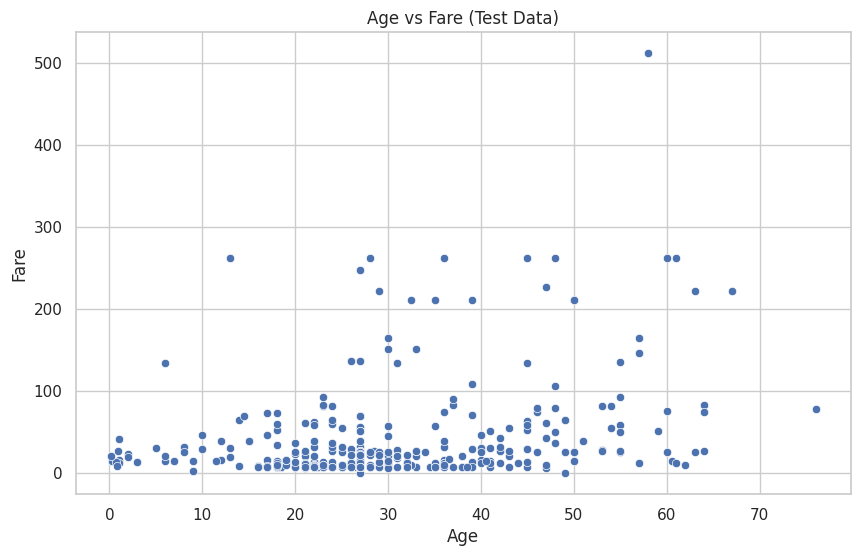

In [127]:
# Scatter plot: Age vs Fare in test data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=test_data, palette='coolwarm')
plt.title('Age vs Fare (Test Data)')
plt.show()

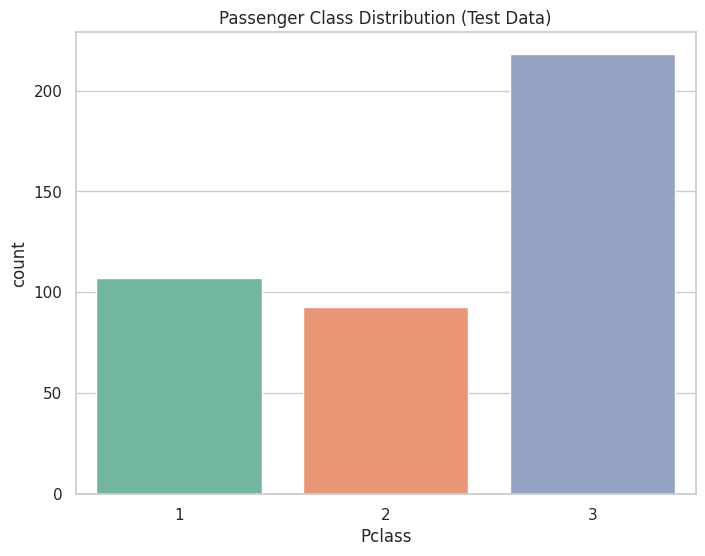

In [128]:
# Bar plot: Passenger Class distribution in test data
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=test_data, palette='Set2')
plt.title('Passenger Class Distribution (Test Data)')
plt.show()

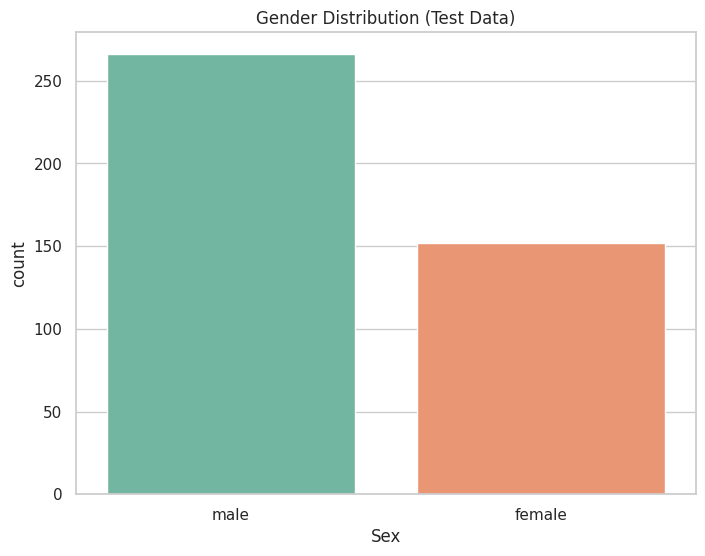

In [129]:
# Bar plot: Gender distribution in test data
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=test_data, palette='Set2')
plt.title('Gender Distribution (Test Data)')
plt.show()

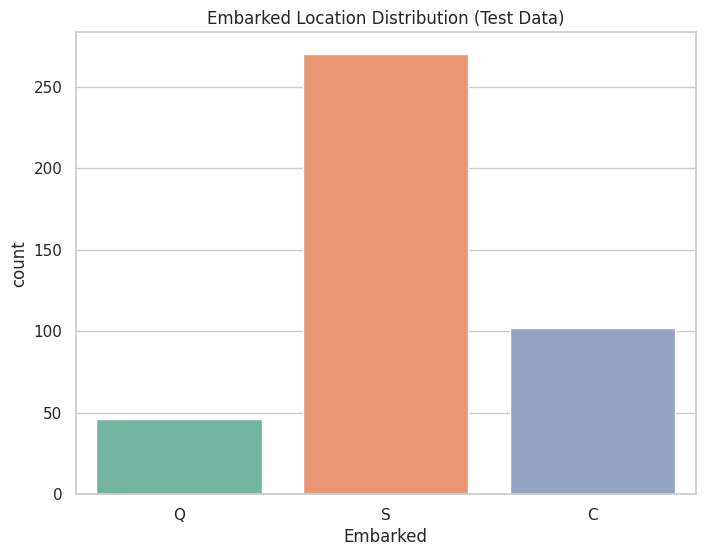

In [130]:
# Bar plot: Embarked location distribution in test data
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=test_data, palette='Set2')
plt.title('Embarked Location Distribution (Test Data)')
plt.show()

# **Data Preprocessing:**

**Encode categorical variables using one-hot encoding or label encoding.**

In [132]:
from sklearn.preprocessing import LabelEncoder

In [133]:
#ONE HOT ENCODING

# One-hot encode the categorical features: 'Sex', 'Embarked'
train_data_encoded = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data_encoded = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)
# Ensure the test data has the same columns as the training data after encoding
missing_cols = set(train_data_encoded.columns) - set(test_data_encoded.columns)
for c in missing_cols:
    test_data_encoded[c] = 0
test_data_encoded = test_data_encoded[train_data_encoded.columns.drop('Survived')]
# Display the first few rows of the encoded training data
print('Train Data',display(train_data_encoded.head()))
print('Test Data',display(test_data_encoded.head()))

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


Train Data None


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,True,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,True,True,False
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,True,False,True
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,False,False,True


Test Data None


**3.	If needed you can apply more preprocessing methods on the given dataset.**

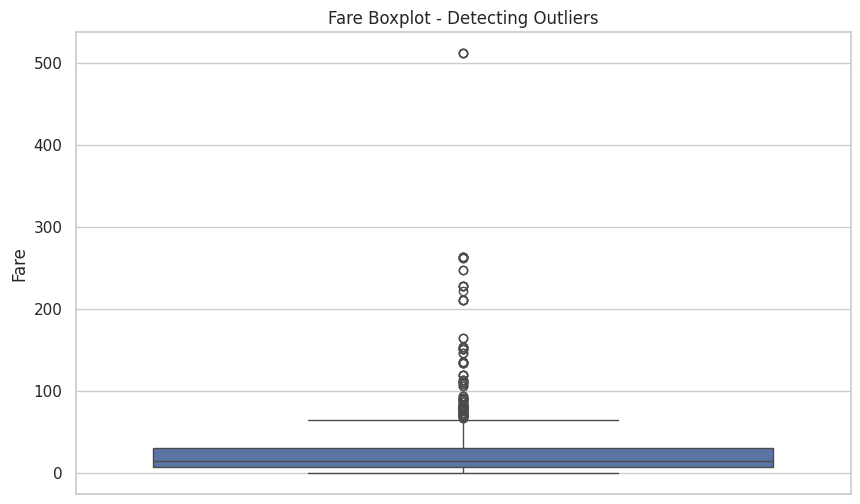

In [134]:
#Handle Outliers
# Detect outliers in the 'Fare' column using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(train_data['Fare'])
plt.title('Fare Boxplot - Detecting Outliers')
plt.show()
# Cap the Fare values to remove extreme outliers
upper_limit = train_data['Fare'].quantile(0.99)  # Cap at the 99th percentile
train_data['Fare'] = np.where(train_data['Fare'] > upper_limit, upper_limit, train_data['Fare'])
test_data['Fare'] = np.where(test_data['Fare'] > upper_limit, upper_limit, test_data['Fare'])

**Feature Scaling**

In [135]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Scale 'Age' and 'Fare' features
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

**Feature Engineering**

In [136]:
# Create a FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Create an IsAlone feature
train_data['IsAlone'] = 1  # Initialize to 1 (alone)
train_data['IsAlone'].loc[train_data['FamilySize'] > 1] = 0  # If FamilySize > 1 -> not alone
test_data['IsAlone'] = 1
test_data['IsAlone'].loc[test_data['FamilySize'] > 1] = 0

# Extract titles from the Name feature
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_data['Title'] = test_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Simplify the titles
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs",
    "Master": "Master", "Dr": "Officer", "Rev": "Officer", "Col": "Officer",
    "Major": "Officer", "Mlle": "Miss", "Countess": "Royalty",
    "Ms": "Miss", "Lady": "Royalty", "Jonkheer": "Royalty",
    "Don": "Royalty", "Dona": "Royalty", "Mme": "Mrs", "Capt": "Officer",
    "Sir": "Royalty"
}
train_data['Title'] = train_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].map(title_mapping)

# Encode the new categorical feature 'Title' using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['Title'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Title'], drop_first=True)

# Ensure the test data has the same columns as the training data after encoding
missing_cols = set(train_data.columns) - set(test_data.columns)
for c in missing_cols:
    test_data[c] = 0
test_data = test_data[train_data.columns.drop('Survived')]

# Display the first few rows of the engineered training data
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565736,1,0,A/5 21171,-0.564109,S,2,0,False,True,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,1,0,PC 17599,0.942548,C,2,0,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258337,0,0,STON/O2. 3101282,-0.548227,S,1,1,True,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,1,0,113803,0.514708,S,2,0,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",male,0.433312,0,0,373450,-0.545285,S,1,1,False,True,False,False,False


In [137]:
# Save the preprocessed data
train_data.to_csv('/content/Preprocessed_Titanic_train.csv', index=False)
test_data.to_csv('/content/Preprocessed_Titanic_test.csv', index=False)

# **Building Predictive Models:**

1.	Split the preprocessed dataset into training and testing sets.

In [138]:
from sklearn.model_selection import train_test_split
# Assuming 'Survived' is the target variable
X = train_data.drop('Survived', axis=1)  # Features
y = train_data['Survived']  # Target variable
# Split the data: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")

X_train shape: (712, 17)
X_val shape: (179, 17)
y_train shape: (712,)
y_val shape: (179,)


2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.


In [139]:
# Identify non-numeric columns in the dataset
non_numeric_columns = train_data.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns.tolist())

Non-numeric columns: ['Name', 'Sex', 'Ticket', 'Embarked', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty']


In [140]:
# Define the columns to drop
columns_to_drop = ['Name', 'Ticket', 'Cabin']

# Drop the columns if they exist
train_data_processed = train_data.drop(columns=[col for col in columns_to_drop if col in train_data.columns])
test_data_processed = test_data.drop(columns=[col for col in columns_to_drop if col in test_data.columns])

# Display the remaining columns to verify
print("Columns in processed training data:", train_data_processed.columns)
print("Columns in processed test data:", test_data_processed.columns)

Columns in processed training data: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty'],
      dtype='object')
Columns in processed test data: Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty'],
      dtype='object')


In [141]:
# Perform one-hot encoding on 'Sex' and 'Embarked'
train_data_processed = pd.get_dummies(train_data_processed, columns=['Sex', 'Embarked'], drop_first=True)
test_data_processed = pd.get_dummies(test_data_processed, columns=['Sex', 'Embarked'], drop_first=True)

# Ensure the test data has the same columns as the training data after encoding
missing_cols = set(train_data_processed.columns) - set(test_data_processed.columns)
for c in missing_cols:
    test_data_processed[c] = 0
test_data_processed = test_data_processed[train_data_processed.columns.drop('Survived')]


In [142]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define features (X) and target variable (y)
X = train_data_processed.drop('Survived', axis=1)
y = train_data_processed['Survived']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8547
Precision: 0.8243
Recall: 0.8243
F1-Score: 0.8243


In [143]:
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:")
print(cm)
report = classification_report(y_val, y_pred)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[92 13]
 [13 61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       105
           1       0.82      0.82      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



3.	Build predictive models using LightGBM and XGBoost algorithms.


In [182]:
!pip install lightgbm xgboost

In [183]:
pip install dask[dataframe]

In [184]:
import lightgbm as lgb
import xgboost as xgb

In [185]:
# Define features (X) and target variable (y)
X = train_data_processed.drop('Survived', axis=1)
y = train_data_processed['Survived']
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
# Train the model
lgb_model.fit(X_train, y_train)
# Make predictions on the validation set
y_pred_lgb = lgb_model.predict(X_val)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [187]:
# Evaluate the LightGBM model
accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
precision_lgb = precision_score(y_val, y_pred_lgb)
recall_lgb = recall_score(y_val, y_pred_lgb)
f1_lgb = f1_score(y_val, y_pred_lgb)

print(f"LightGBM Model - Accuracy: {accuracy_lgb:.4f}")
print(f"LightGBM Model - Precision: {precision_lgb:.4f}")
print(f"LightGBM Model - Recall: {recall_lgb:.4f}")
print(f"LightGBM Model - F1-Score: {f1_lgb:.4f}")

LightGBM Model - Accuracy: 0.8156
LightGBM Model - Precision: 0.7887
LightGBM Model - Recall: 0.7568
LightGBM Model - F1-Score: 0.7724


In [188]:
cm_lgb = confusion_matrix(y_val, y_pred_lgb)
print("\nLightGBM Confusion Matrix:")
print(cm_lgb)

report_lgb = classification_report(y_val, y_pred_lgb)
print("\nLightGBM Classification Report:")
print(report_lgb)


LightGBM Confusion Matrix:
[[90 15]
 [18 56]]

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [189]:
#Train and Evaluate XGBoost Model
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_val)

In [191]:
# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
precision_xgb = precision_score(y_val, y_pred_xgb)
recall_xgb = recall_score(y_val, y_pred_xgb)
f1_xgb = f1_score(y_val, y_pred_xgb)

print(f"XGBoost Model - Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Model - Precision: {precision_xgb:.4f}")
print(f"XGBoost Model - Recall: {recall_xgb:.4f}")
print(f"XGBoost Model - F1-Score: {f1_xgb:.4f}")


XGBoost Model - Accuracy: 0.7989
XGBoost Model - Precision: 0.7639
XGBoost Model - Recall: 0.7432
XGBoost Model - F1-Score: 0.7534


In [192]:
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
print("\nXGBoost Confusion Matrix:")
print(cm_xgb)
report_xgb = classification_report(y_val, y_pred_xgb)
print("\nXGBoost Classification Report:")
print(report_xgb)


XGBoost Confusion Matrix:
[[88 17]
 [19 55]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



4.	Train the models on the training set and evaluate their performance on the testing set.



In [193]:
# Define the features (X) and target (y) for the training set
X_train = train_data_processed.drop('Survived', axis=1)
y_train = train_data_processed['Survived']

# Ensure the test data is aligned with the training data
X_test = test_data_processed

In [194]:
# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model on the entire training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_lgb = lgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288


In [195]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the entire training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred_xgb = xgb_model.predict(X_test)

In [196]:
# Assuming 'y_val' is your true validation labels and you need to generate predictions on the correct validation set (X_val)
y_val_pred_lgb = lgb_model.predict(X_val) # Replace X_val with your actual validation data

# Evaluate LightGBM
print("LightGBM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_lgb):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_lgb):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_lgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lgb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_lgb))

LightGBM Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
 [[105   0]
 [  0  74]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [178]:
# Evaluate XGBoost
print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_xgb))


XGBoost Model Evaluation:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-Score: 0.7639
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [164]:
!pip install lightgbm xgboost scikit-learn

In [165]:
# Parameter grid for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7]
}

In [166]:
from sklearn.model_selection import GridSearchCV
# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Initialize GridSearchCV
lgb_grid_search = GridSearchCV(estimator=lgb_model, param_grid=lgb_param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform Grid Search
lgb_grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for LightGBM:", lgb_grid_search.best_params_)
best_lgb_model = lgb_grid_search.best_estimator_

# Evaluate on the validation set
y_val_pred_lgb = best_lgb_model.predict(X_val)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [170]:
# Evaluate the best LightGBM model
print("LightGBM Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_lgb):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_lgb):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_lgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_lgb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_lgb))

LightGBM Model Evaluation:
Accuracy: 0.8939
Precision: 0.8767
Recall: 0.8649
F1-Score: 0.8707
Confusion Matrix:
 [[96  9]
 [10 64]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.88      0.86      0.87        74

    accuracy                           0.89       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.89      0.89      0.89       179



In [171]:
# Parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [172]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid,
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform Grid Search
xgb_grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters for XGBoost:", xgb_grid_search.best_params_)
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate on the validation set
y_val_pred_xgb = best_xgb_model.predict(X_val)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [173]:
# Evaluate the best XGBoost model
print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_val, y_val_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_val, y_val_pred_xgb):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_xgb))
print("Classification Report:\n", classification_report(y_val, y_val_pred_xgb))


XGBoost Model Evaluation:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-Score: 0.7639
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# **Comparative Analysis:**

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.


In [174]:
# Summary of performance metrics for LightGBM and XGBoost
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'LightGBM': [accuracy_lgb, precision_lgb, recall_lgb, f1_lgb],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]
})

print(metrics_comparison)

      Metric  LightGBM   XGBoost
0   Accuracy  0.815642  0.798883
1  Precision  0.788732  0.763889
2     Recall  0.756757  0.743243
3   F1-Score  0.772414  0.753425


2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


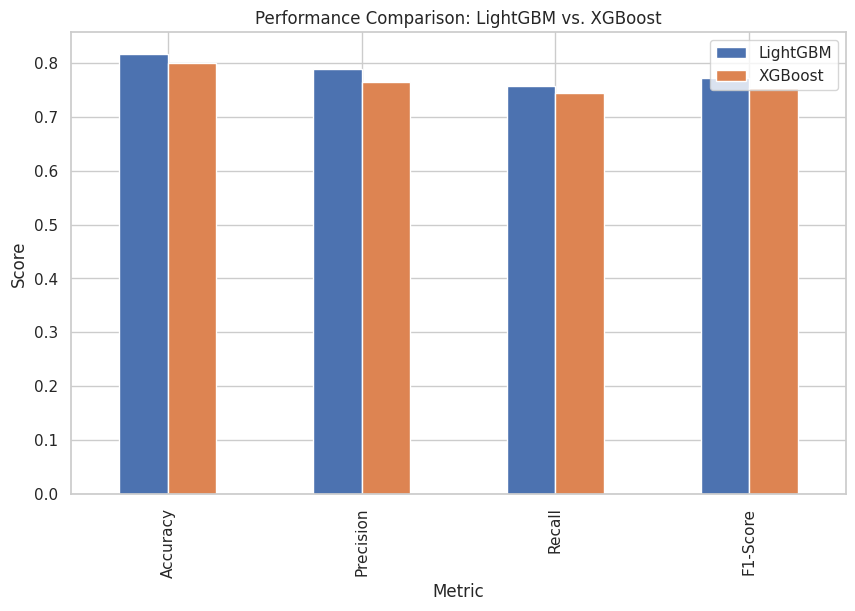

In [175]:
metrics_comparison.plot(x='Metric', kind='bar', figsize=(10, 6))
plt.title('Performance Comparison: LightGBM vs. XGBoost')
plt.ylabel('Score')
plt.show()